In [165]:
import sys
import regions
import pyavm
import numpy as np
import PIL

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm

import reproject 
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u

from reproject import reproject_interp


In [166]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [167]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [168]:
def save_rgb(img, filename, flip=-1):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::flip,:,:])
    img.save(filename)

In [4]:
ls /orange/adamginsburg/jwst/cloudc/images/*merged-fortricolor.fits

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


# F405N and F466N

In [4]:
rgb_withstars = np.array(
      [
       fits.getdata(f'{basepath}/images/F466_reproj_merged-fortricolor.fits'),
       fits.getdata(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'),
      ]
).swapaxes(0,2).swapaxes(0,1)

In [5]:
#AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'))
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'))

In [ ]:
narrowsum_withstars = rgb_withstars[:,:,0] + rgb_withstars[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb_withstars[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb_withstars[:,:,0]),
                       simple_norm(narrowsum_withstars,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum_withstars),
                       simple_norm(rgb_withstars[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb_withstars[:,:,1]),
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
plt.xticks([]);
plt.yticks([]);

outfn = f"{basepath}/images/cloudcJWST_merged_longwave_narrowband_rotated_withstars.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


# F405N and F410M

In [5]:
ls /orange/adamginsburg/jwst/cloudc/images/*fortricolor.fits

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


In [6]:
rgb_withstars = np.array(
      [
       fits.getdata(f'{basepath}/images/F410_reproj_merged-fortricolor.fits'),
       fits.getdata(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'),
      ]
).swapaxes(0,2).swapaxes(0,1)

In [7]:
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F405_reproj_merged-fortricolor.fits'))

In [ ]:
narrowsum_withstars = rgb_withstars[:,:,0] + rgb_withstars[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb_withstars[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb_withstars[:,:,0]),
                       simple_norm(narrowsum_withstars,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum_withstars),
                       simple_norm(rgb_withstars[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb_withstars[:,:,1]),
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
plt.xticks([]);
plt.yticks([]);

#outfn = f"{basepath}/images/cloudcJWST_merged_f212-f405_rotated_withstars.png"
#save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
#AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


# Spitzer Glimpse

In [169]:
ls /orange/adamginsburg/cmz/glimpse_data/*.fits

/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits
/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits


In [170]:
data_glimpse = np.array( # 3.6, 4.5, 5.8, 8
    [
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits'),
    #fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits'),
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits'),
    fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits'),
    ]
).swapaxes(0,2).swapaxes(0,1)

In [171]:
data_glimpse.shape

(13520, 9320, 3)

In [172]:
position = SkyCoord('17:46:21.4701708277', '-28:35:38.0673181068', unit=(u.hourangle, u.deg))

In [173]:
l = 7*u.arcmin
w = 10*u.arcmin

In [174]:
hdu = fits.open('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits')[0]
data = hdu.data
head = hdu.header
#ww, shape = reproject.mosaicking.find_optimal_celestial_wcs(hdu)
#array, footprint = reproject_interp(hdu, ww, shape_out=shape)
#head1 = head.copy().update(ww.to_header())

pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I1 = Cutout2D(data, position=position, size=size, wcs=ww)

In [ ]:
ax = plt.subplot(111, projection=cutout_I1.wcs)
ax.imshow(np.nan_to_num(cutout_I1.data), vmin=0, vmax=50)

In [ ]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I2 = Cutout2D(data, position=position, size=size, wcs=ww)

In [ ]:
ax = plt.subplot(111, projection=cutout_I2.wcs)
ax.imshow(np.nan_to_num(cutout_I2.data), vmin=0, vmax=50)

In [ ]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I3 = Cutout2D(data, position=position, size=size, wcs=ww)

In [ ]:
ax = plt.subplot(111, projection=cutout_I3.wcs)
ax.imshow(np.nan_to_num(cutout_I3.data), vmin=0, vmax=150)

In [ ]:
data = fits.getdata('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits')
head = fits.getheader('/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits')
pixel_scale = head['PIXSCAL1']*u.arcsec/u.pix
ww = WCS(head)
size = ((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
cutout_I4 = Cutout2D(data, position=position, size=size, wcs=ww)

In [ ]:
ax = plt.subplot(111, projection=cutout_I4.wcs)
ax.imshow(np.nan_to_num(cutout_I4.data), vmin=0, vmax=250)

In [ ]:
rgb = np.array(
    [
        cutout_I1.data,
        cutout_I3.data,
        cutout_I4.data
    ]
).swapaxes(0,2).swapaxes(0,1)

In [ ]:
reg = regions.Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/f4_fov_cloudc.reg', format='ds9')
reg[0]

In [ ]:
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,-1], stretch='linear', min_cut=10, max_cut=350)(rgb[:,:,-1]), # 350
                       simple_norm(rgb[:,:,-2], stretch='linear', min_cut=10, max_cut=200)(rgb[:,:,-2]), # 200
                       simple_norm(rgb[:,:,-3], stretch='linear', min_cut=10, max_cut=100)(rgb[:,:,-3]), # 100
]).swapaxes(0,2).swapaxes(0,1)
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += -0.35  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
pixel_region = reg[0].to_pixel(cutout_I1.wcs)
pixel_region.plot(color='k')
plt.xticks([]);
plt.yticks([]);

# Three Filters

In [21]:
ls /orange/adamginsburg/jwst/cloudc/images/*fortricolor*

/orange/adamginsburg/jwst/cloudc/images/F182_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits
/orange/adamginsburg/jwst/cloudc/images/F466_reproj_merged-fortricolor.fits


In [154]:
position = SkyCoord('17:46:21.4695266413', '-28:35:38.2082071644', unit=(u.hourangle, u.deg))
#position = SkyCoord('17:46:18.9080445728', '-28:37:43.2668002383', unit=(u.hourangle, u.deg))
#position = SkyCoord('17:46:20.8032323396', '-28:33:45.2838234425', unit=(u.hourangle, u.deg))

In [155]:
l = 1 * u.arcmin
w = 1 * u.arcmin

In [156]:
def get_cutout(filename, position, l, w):
    try: 
        hdu = fits.open(filename, ext='SCI')[0]
    except: 
        hdu = fits.open(filename)[0]
    data = hdu.data
    head = hdu.header

    #pixel_scale = head['PIXSCALE']*u.arcsec/u.pix
    ww = WCS(head)
    size = (l, w)
    #((l/pixel_scale).to(u.pix), (w/pixel_scale).to(u.pix))
    cutout = Cutout2D(data, position=position, size=size, wcs=ww)
    return cutout


In [157]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits'
cutout_R = get_cutout(filename, position, l, w)

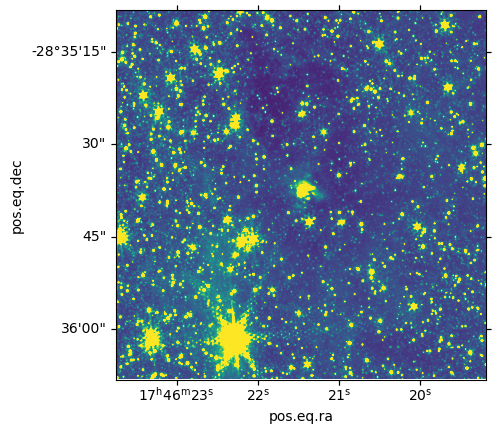

In [158]:
ax = plt.subplot(111, projection=cutout_R.wcs)
ax.imshow(np.nan_to_num(cutout_R.data), vmin=0, vmax=50)

In [159]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F212_reproj_merged-fortricolor.fits'
cutout_G = get_cutout(filename, position, l, w)

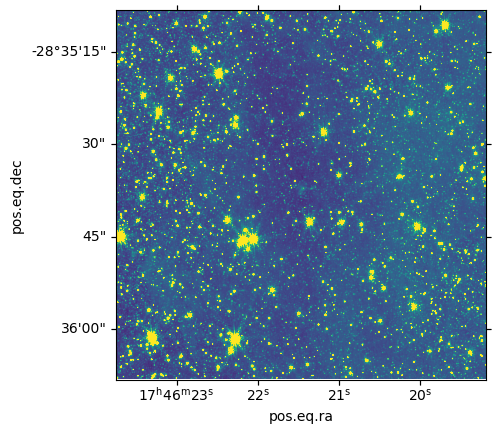

In [160]:
ax = plt.subplot(111, projection=cutout_G.wcs)
ax.imshow(np.nan_to_num(cutout_G.data), vmin=0, vmax=50)

In [161]:
filename = '/orange/adamginsburg/jwst/cloudc/images/F187_reproj_merged-fortricolor.fits'
cutout_B = get_cutout(filename, position, l, w)

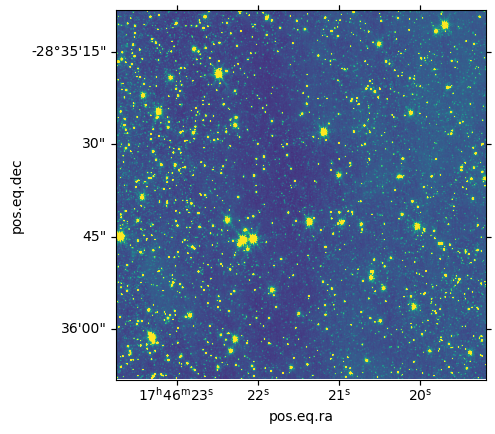

In [162]:
ax = plt.subplot(111, projection=cutout_B.wcs)
ax.imshow(np.nan_to_num(cutout_B.data), vmin=0, vmax=50)

In [163]:
rgb = np.array(
    [
        cutout_R.data,
        cutout_G.data,
        cutout_B.data
    ]
).swapaxes(0,2).swapaxes(0,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


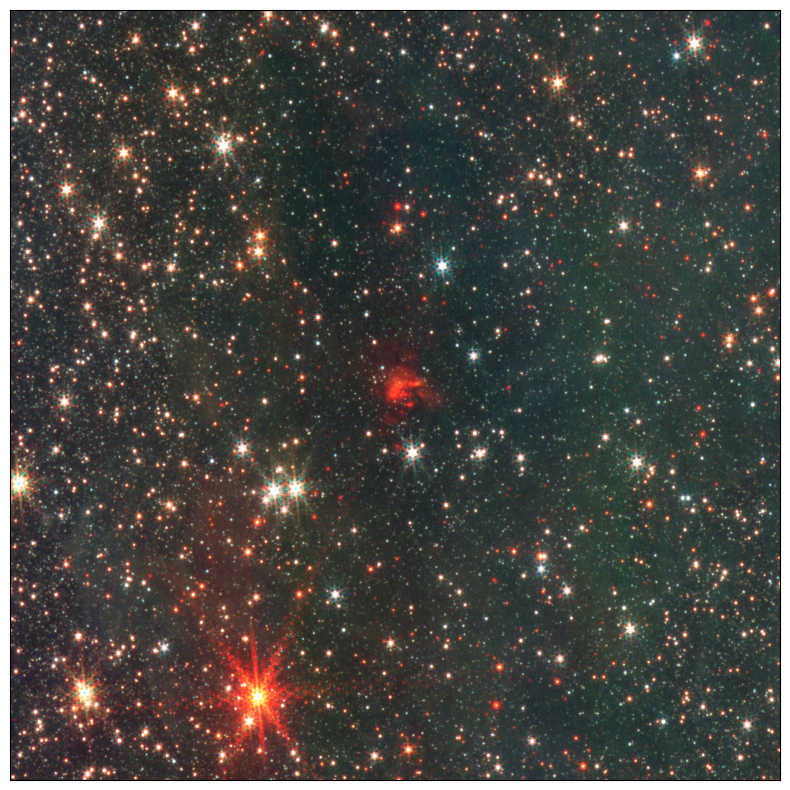

In [164]:
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=200)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=200)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_cut=-1, max_cut=200)(rgb[:,:,2]),
]).swapaxes(0,2).swapaxes(0,1)
plt.figure(figsize=(24,10))
plt.imshow(rgb_scaled, origin='lower')
plt.xticks([]);
plt.yticks([]);